# 08 - Pandas Group By

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# use college scorecard 2017-18 acedemic year

column_list = ["UNITID", "INSTNM", "STABBR", "ST_FIPS", "REGION", "CONTROL", "ADM_RATE", "TUITIONFEE_IN"]
df = pd.read_csv("data/MERGED2017_18_PP.csv", usecols=column_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 8 columns):
UNITID           7115 non-null int64
INSTNM           7115 non-null object
STABBR           7115 non-null object
CONTROL          7115 non-null int64
ST_FIPS          7115 non-null int64
REGION           7115 non-null int64
ADM_RATE         2037 non-null float64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 444.8+ KB


In [63]:
df.head()

,UNITID,INSTNM,STABBR,CONTROL,ST_FIPS,REGION,ADM_RATE,TUITIONFEE_IN
0,100654,Alabama A & M University,AL,1,1,5,0.9027,9857.0
1,100663,University of Alabama at Birmingham,AL,1,1,5,0.9181,8328.0
2,100690,Amridge University,AL,2,1,5,NaN,6900.0
3,100706,University of Alabama in Huntsville,AL,1,1,5,0.8123,10280.0
4,100724,Alabama State University,AL,1,1,5,0.9787,11068.0


In [64]:
# the mapping between State FIPS code and State name is from the dictionary
# We would like to replace the cryptic number with name
# saved the mapping to a text file which is tab delimited
# Read the text file in

state_df = pd.read_csv("data/STATE_FIPS.txt", sep="\t", header=None, names=["ST_FIPS", "STATE_NAME"])
state_df.head()

,ST_FIPS,STATE_NAME
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


In [65]:
### Turn the data two columns into a dictionary

state_dict = dict(zip(state_df["ST_FIPS"], state_df["STATE_NAME"]))
print(state_dict)

{1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 60: 'American Samoa', 64: 'Federated States of Micronesia', 66: 'Guam', 69: 'Northern Mariana Islands', 70: 'Palau', 72: 'Puerto Rico', 78: 'Virgin Islands'

In [66]:
df.describe(include="all")

,UNITID,INSTNM,STABBR,CONTROL,ST_FIPS,REGION,ADM_RATE,TUITIONFEE_IN
count,7.115000e+03,7115,7115,7115.000000,7115.000000,7115.000000,2037.000000,4028.000000
unique,NaN,6981,59,NaN,NaN,NaN,NaN,NaN
top,NaN,Stevens-Henager College,CA,NaN,NaN,NaN,NaN,NaN
freq,NaN,7,716,NaN,NaN,NaN,NaN,NaN
mean,1.866527e+06,NaN,NaN,2.129585,29.131975,4.611244,0.681822,15081.399950
std,6.957330e+06,NaN,NaN,0.834534,16.741847,2.171476,0.212179,12723.724262
min,1.006540e+05,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.740965e+05,NaN,NaN,1.000000,13.000000,3.000000,0.550000,5246.250000
50%,2.290270e+05,NaN,NaN,2.000000,29.000000,5.000000,0.707600,11296.000000
75%,4.506095e+05,NaN,NaN,3.000000,42.000000,6.000000,0.838400,19400.000000


In [67]:
# The region should be a categorical variable instead of an ingteger
df["REGION"] = df["REGION"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 8 columns):
UNITID           7115 non-null int64
INSTNM           7115 non-null object
STABBR           7115 non-null object
CONTROL          7115 non-null int64
ST_FIPS          7115 non-null int64
REGION           7115 non-null object
ADM_RATE         2037 non-null float64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 444.8+ KB


In [68]:
df.describe(include="all")

,UNITID,INSTNM,STABBR,CONTROL,ST_FIPS,REGION,ADM_RATE,TUITIONFEE_IN
count,7.115000e+03,7115,7115,7115.000000,7115.000000,7115,2037.000000,4028.000000
unique,NaN,6981,59,NaN,NaN,10,NaN,NaN
top,NaN,Stevens-Henager College,CA,NaN,NaN,5,NaN,NaN
freq,NaN,7,716,NaN,NaN,1788,NaN,NaN
mean,1.866527e+06,NaN,NaN,2.129585,29.131975,NaN,0.681822,15081.399950
std,6.957330e+06,NaN,NaN,0.834534,16.741847,NaN,0.212179,12723.724262
min,1.006540e+05,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000
25%,1.740965e+05,NaN,NaN,1.000000,13.000000,NaN,0.550000,5246.250000
50%,2.290270e+05,NaN,NaN,2.000000,29.000000,NaN,0.707600,11296.000000
75%,4.506095e+05,NaN,NaN,3.000000,42.000000,NaN,0.838400,19400.000000


In [69]:
df["STABBR"].unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [70]:
df["ST_FIPS"].unique()

array([ 1,  2, 53,  4, 35,  5,  6, 27,  8,  9, 36, 10, 11, 12, 13, 15, 16,
       17, 18, 26, 19, 20, 29, 21, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34,
       37, 38, 39, 54, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56,
       60, 66, 69, 72, 64, 70, 78, 68], dtype=int64)

In [71]:
# Create a new column "STATE_NAME" based on the dictionary created earlier

df["STATE_NAME"] = df["ST_FIPS"].map(state_dict)
df.sample(5)

,UNITID,INSTNM,STABBR,CONTROL,ST_FIPS,REGION,ADM_RATE,TUITIONFEE_IN,STATE_NAME
5246,448770,Automotive Training Center-Warminster,PA,3,42,2,NaN,NaN,Pennsylvania
838,139995,Gupton Jones College of Funeral Service,GA,2,13,5,NaN,11700.0,Georgia
4513,417248,Howell Cheney THS/CT Aero Tech School,CT,1,9,1,NaN,NaN,Connecticut
2583,199865,Warren Wilson College,NC,2,37,5,0.7936,35244.0,North Carolina
2889,208859,Phagans Grants Pass College of Beauty,OR,3,41,8,NaN,NaN,Oregon


In [72]:
df["STATE_NAME"].unique()

array(['Alabama', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Arkansas', 'California', 'Minnesota', 'Colorado', 'Connecticut',
       'New York', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Michigan',
       'Iowa', 'Kansas', 'Missouri', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Mississippi', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'North Carolina',
       'North Dakota', 'Ohio', 'West Virginia', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Wisconsin',
       'Wyoming', 'American Samoa', 'Guam', 'Northern Mariana Islands',
       'Puerto Rico', 'Federated States of Micronesia', 'Palau',
       'Virgin Islands', nan], dtype=object)

In [73]:
df[df["STATE_NAME"].isna()]

,UNITID,INSTNM,STABBR,CONTROL,ST_FIPS,REGION,ADM_RATE,TUITIONFEE_IN,STATE_NAME
4267,376695,College of the Marshall Islands,MH,1,68,9,NaN,4885.0,NaN


In [74]:
# Calculate the mean value of ADM_RATE and TUITIONFEE_IN using groupby
# The result is a new dataframe and can be used for further analysis

by_state_df = df.groupby("STATE_NAME").mean().reset_index()
by_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
STATE_NAME       58 non-null object
UNITID           58 non-null float64
CONTROL          58 non-null float64
ST_FIPS          58 non-null float64
ADM_RATE         55 non-null float64
TUITIONFEE_IN    58 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [75]:
# Round up to 2 decimals

by_state_df = by_state_df.round({"ADM_RATE":2, "TUITIONFEE_IN":2})
by_state_df.head()

,STATE_NAME,UNITID,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN
0,Alabama,1.406427e+06,1.797872,1.0,0.68,10106.75
1,Alaska,1.773741e+05,1.555556,2.0,0.79,8789.14
2,American Samoa,2.407360e+05,1.000000,60.0,NaN,3950.00
3,Arizona,1.977872e+06,2.312000,4.0,0.74,9726.65
4,Arkansas,1.850123e+06,2.000000,5.0,0.72,9028.91


In [76]:
# sort the dataframe

by_state_df.sort_values('TUITIONFEE_IN', ascending=True, inplace=True)
by_state_df.head()

,STATE_NAME,UNITID,CONTROL,ST_FIPS,ADM_RATE,TUITIONFEE_IN
42,Palau,243647.0,1.0,70.0,NaN,3250.00
57,Wyoming,240640.5,1.3,56.0,0.97,3384.75
2,American Samoa,240736.0,1.0,60.0,NaN,3950.00
38,Northern Mariana Islands,240790.0,1.0,69.0,NaN,4038.00
10,Federated States of Micronesia,243638.0,1.0,64.0,0.71,4750.00


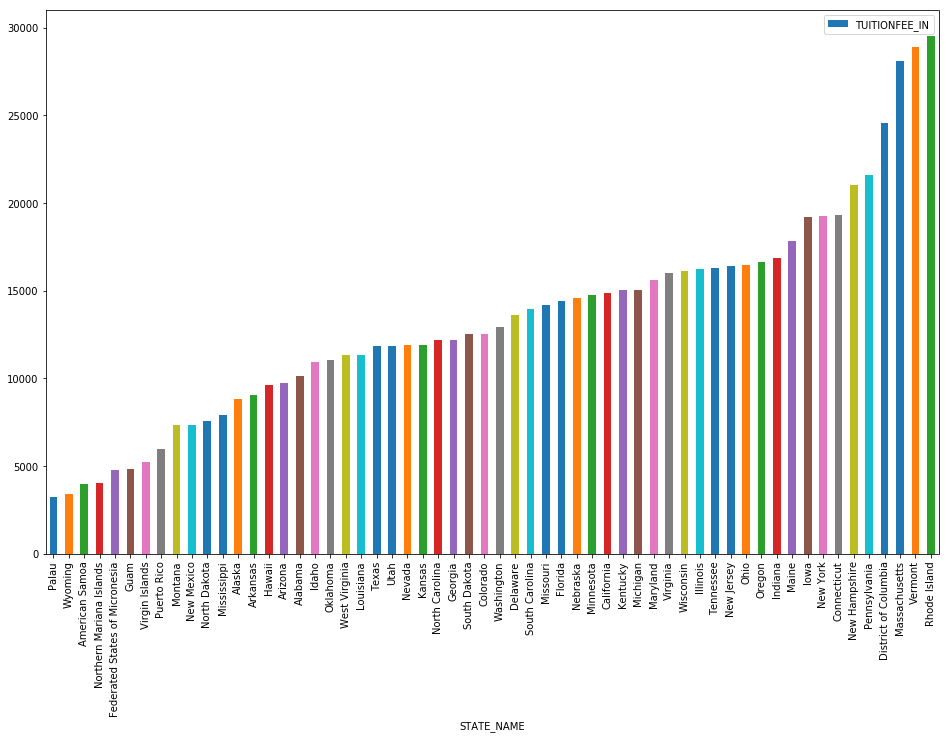

In [77]:
##### Make a bar plot which gives us a sense of how expense each state is 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.plot.bar(x="STATE_NAME", y="TUITIONFEE_IN", rot=90, ax=ax)

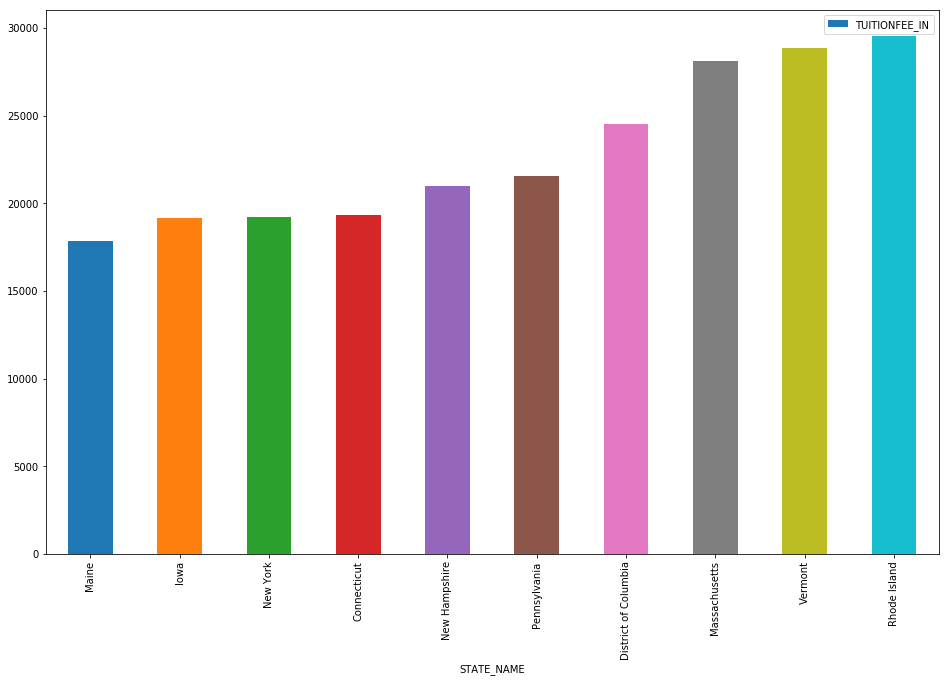

In [78]:
# Make a bar plot of top 10 states that are most expensive 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.tail(10).plot.bar(x="STATE_NAME", y="TUITIONFEE_IN",ax=ax)

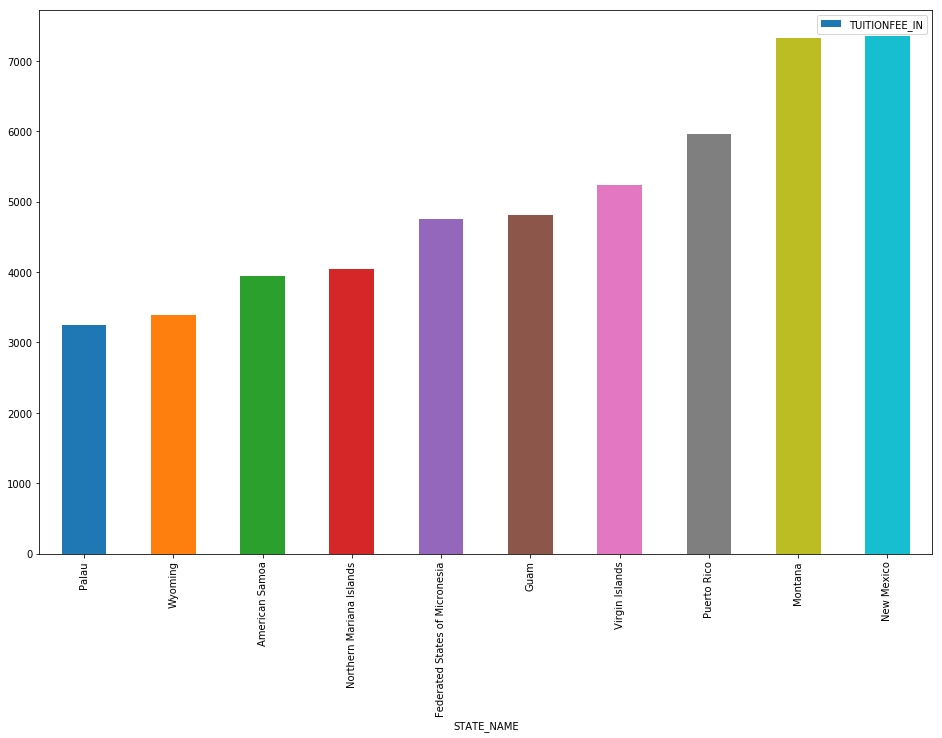

In [79]:
# Make a bar plot of  10 lease expesive states 

fig, ax = plt.subplots(figsize=(16,10))
by_state_df.head(10).plot.bar(x="STATE_NAME", y="TUITIONFEE_IN",ax=ax)

In [80]:
# Find out number of colleges each state has

df["STATE_NAME"].value_counts()

California                        716
New York                          452
Texas                             446
Florida                           412
Pennsylvania                      378
Ohio                              318
Illinois                          277
Michigan                          195
North Carolina                    188
Missouri                          180
Massachusetts                     178
Virginia                          177
Tennessee                         176
Georgia                           175
New Jersey                        162
Indiana                           155
Puerto Rico                       146
Louisiana                         131
Oklahoma                          129
Arizona                           125
Minnesota                         124
Washington                        119
Colorado                          113
South Carolina                    110
Wisconsin                         109
Kentucky                          101
Alabama     

In [81]:
# The end